In [ ]:
#https://platform.stability.ai/docs/legacy/grpc-api/features/inpainting#Python

In [ ]:
%pip install stability-sdk

In [20]:
import io
import os
import warnings

from PIL import Image
from stability_sdk import client
import stability_sdk.interfaces.gooseai.generation.generation_pb2 as generation

# Our Host URL should not be prepended with "https" nor should it have a trailing slash.
os.environ['STABILITY_HOST'] = 'grpc.stability.ai:443'

# Sign up for an account at the following link to get an API Key.
# https://platform.stability.ai/

# Click on the following link once you have created an account to be taken to your API Key.
# https://platform.stability.ai/account/keys

# Paste your API Key below.

os.environ['STABILITY_KEY'] = 'sk-yA7ggWKUgcgSaQQleVTo55CIy0mDWYablT0ZZ31WgpuACt0O'

In [19]:
# Set up our connection to the API.
stability_api = client.StabilityInference(
    key=os.environ['STABILITY_KEY'], # API Key reference.
    verbose=True, # Print debug messages.
    engine="stable-diffusion-xl-1024-v1-0", # Set the engine to use for generation.
    # Check out the following link for a list of available engines: https://platform.stability.ai/docs/features/api-parameters#engine
)

In [53]:
# Set up our initial generation parameters.
answers = stability_api.generate(
    prompt="FAN restaurant in San Isidro Peru near Pasaje Atenas", # The prompt we want to generate an image from.
    seed=121245125, # If a seed is provided, the resulting generated image will be deterministic.
                    # What this means is that as long as all generation parameters remain the same, you can always recall the same image simply by generating it again.
                    # Note: This isn't quite the case for CLIP Guided generations, which we tackle in the CLIP Guidance documentation.
    steps=50, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=1024, # Generation width, defaults to 512 if not included.
    height=1024, # Generation height, defaults to 512 if not included.
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_dpmpp_2m if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m, k_dpmpp_sde)
)

# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, display generated image.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            global img
            img = Image.open(io.BytesIO(artifact.binary))
            img.save(str(artifact.seed)+ ".png") # Save our generated images its seed number as the filename.

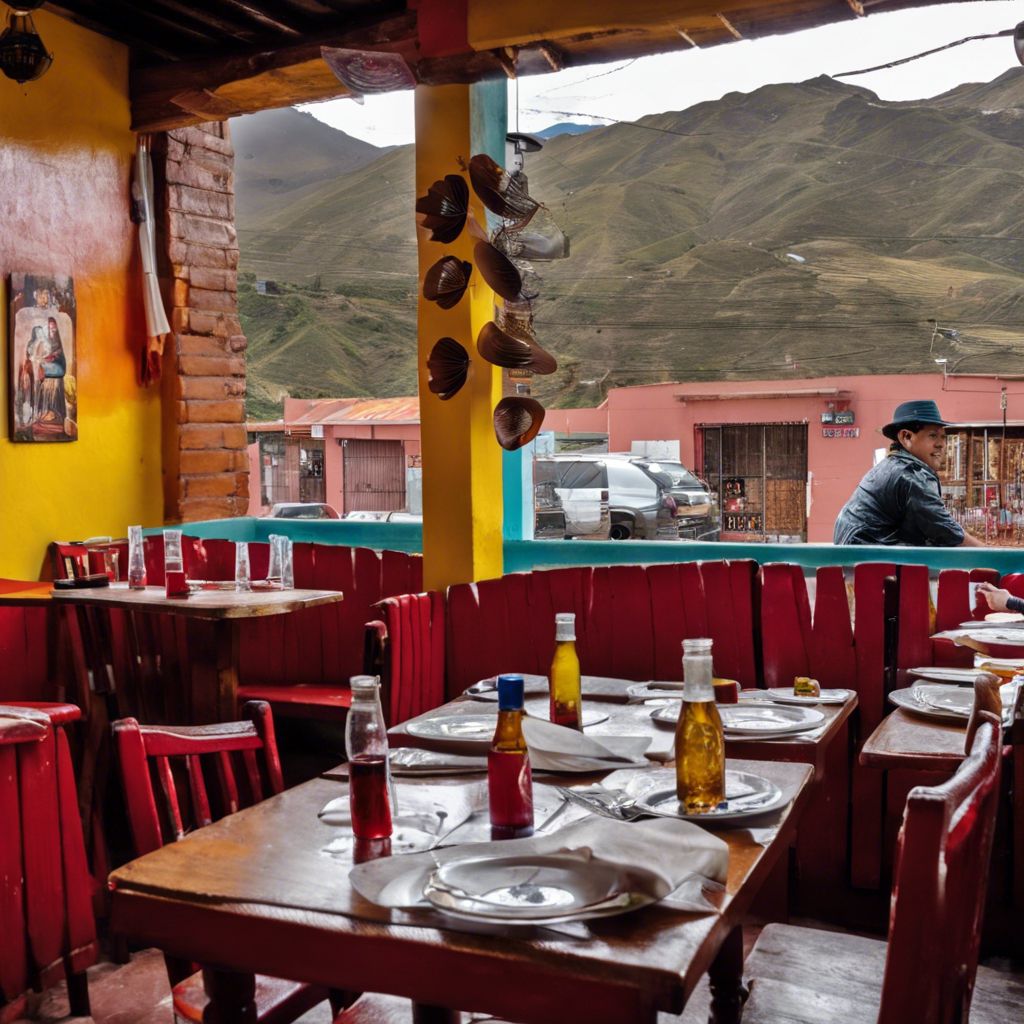

In [54]:
img

# Inpainting + Masking

In [36]:
img = Image.open('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Tesis/11_Project_Analysed_DB/1 summary missing/Avatar_The_Last_Airbender/scenes_output/scene_7_frame_659.jpg')

# mask_i = Image.open('/content/mask.png')

# Feathering the edges of our mask generally helps provide a better result. Alternately, you can feather the mask in a suite like Photoshop or GIMP.

blur = GaussianBlur(11,20)
# mask = blur(mask_i)

In [37]:
answers = stability_api.generate(
    prompt="add makeup to the characters in the image",
    init_image=img,
    # mask_image=mask,
    start_schedule=1,
    seed=44332211, # If attempting to transform an image that was previously generated with our API,
                   # initial images benefit from having their own distinct seed rather than using the seed of the original image generation.
    steps=50, # Amount of inference steps performed on image generation. Defaults to 30.
    cfg_scale=8.0, # Influences how strongly your generation is guided to match your prompt.
                   # Setting this value higher increases the strength in which it tries to match your prompt.
                   # Defaults to 7.0 if not specified.
    width=1024, # Generation width, if not included defaults to 512 or 1024 depending on the engine.
    height=1024, # Generation height, if not included defaults to 512 or 1024 depending on the engine.
    sampler=generation.SAMPLER_K_DPMPP_2M # Choose which sampler we want to denoise our generation with.
                                                 # Defaults to k_lms if not specified. Clip Guidance only supports ancestral samplers.
                                                 # (Available Samplers: ddim, plms, k_euler, k_euler_ancestral, k_heun, k_dpm_2, k_dpm_2_ancestral, k_dpmpp_2s_ancestral, k_lms, k_dpmpp_2m, k_dpmpp_sde)
)

# Set up our warning to print to the console if the adult content classifier is tripped.
# If adult content classifier is not tripped, save generated image.
for resp in answers:
    for artifact in resp.artifacts:
        if artifact.finish_reason == generation.FILTER:
            warnings.warn(
                "Your request activated the API's safety filters and could not be processed."
                "Please modify the prompt and try again.")
        if artifact.type == generation.ARTIFACT_IMAGE:
            global img2
            img2 = Image.open(io.BytesIO(artifact.binary))
            img2.save(str(artifact.seed)+ ".png") # Save our completed image with its seed number as the filename.

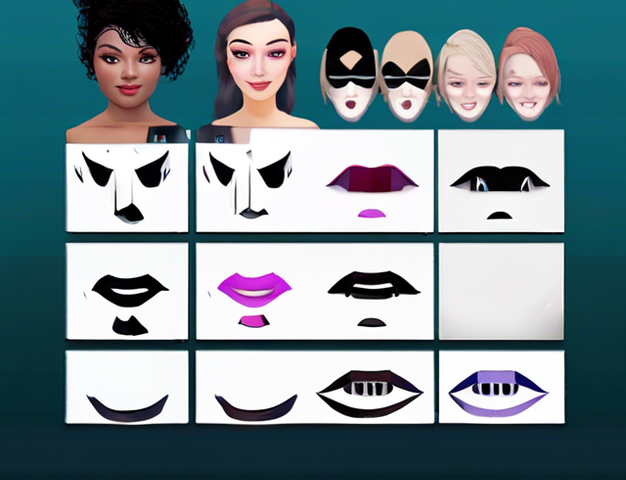

In [38]:
img2

# Segement Anything Model by Meta AI

In [55]:
#https://github.com/facebookresearch/segment-anything?tab=readme-ov-file

In [42]:
import os
HOME = os.getcwd()
print("HOME:", HOME)

HOME: /Users/santiagowon/Dropbox/Santiago/01. Maestria/Tesis/10_Project


In [49]:
%pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /private/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/pip-req-build-1jxe0qls
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /private/var/folders/n0/38c81twx5113rcypg07k6l080000gn/T/pip-req-build-1jxe0qls
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
Note: you may need to restart the kernel to use updated packages.


In [50]:
%pip install opencv-python pycocotools matplotlib onnxruntime onnx

  Obtaining dependency information for pycocotools from https://files.pythonhosted.org/packages/6b/56/9eedccfd1cfdaf6553d527bed0b2b5572550567a5786a8beb098027a3e5e/pycocotools-2.0.8-cp311-cp311-macosx_10_9_universal2.whl.metadata
  Obtaining dependency information for onnxruntime from https://files.pythonhosted.org/packages/fa/f6/d0000c17134d7078e32d91c721c4ebad157c2e129ceab592d2444f5d38b1/onnxruntime-1.16.3-cp311-cp311-macosx_10_15_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 6.9 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for coloredlogs from https://files.pythonhosted.org/packages/a7/06/3d6badcf13db419e25b07041d9c7b4a2c331d3f4e7134445ec5df57714cd/coloredlogs-15.0.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for humanfriendly>=9.1 from https://files.pythonhosted.org/packages/f0/0

In [59]:
import cv2
from segment_anything import SamPredictor, sam_model_registry, SamAutomaticMaskGenerator

sam = sam_model_registry["vit_h"](checkpoint="/Users/santiagowon/Dropbox/Santiago/01. Maestria/Tesis/10_Project/SAM Model Weights/sam_vit_h_4b8939.pth")
predictor = SamPredictor(sam)
image = cv2.imread('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Tesis/11_Project_Analysed_DB/1 summary missing/Avatar_The_Last_Airbender/scenes_output/scene_7_frame_659.jpg')
mask_generator = SamAutomaticMaskGenerator(sam)
masks = mask_generator.generate(image)


In [60]:
masks

[{'segmentation': array([[ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         [ True,  True,  True, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 6488,
  'bbox': [0, 0, 104, 85],
  'predicted_iou': 1.0134620666503906,
  'point_coords': [[29.34375, 67.5]],
  'stability_score': 0.9875842928886414,
  'crop_box': [0, 0, 626, 480]},
 {'segmentation': array([[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 21170,
  'bbox': [362, 0, 263, 97],


# Automatically generating object masks with SAM

In [ ]:
# https://github.com/facebookresearch/segment-anything/blob/main/notebooks/automatic_mask_generator_example.ipynb

In [61]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import cv2

In [62]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

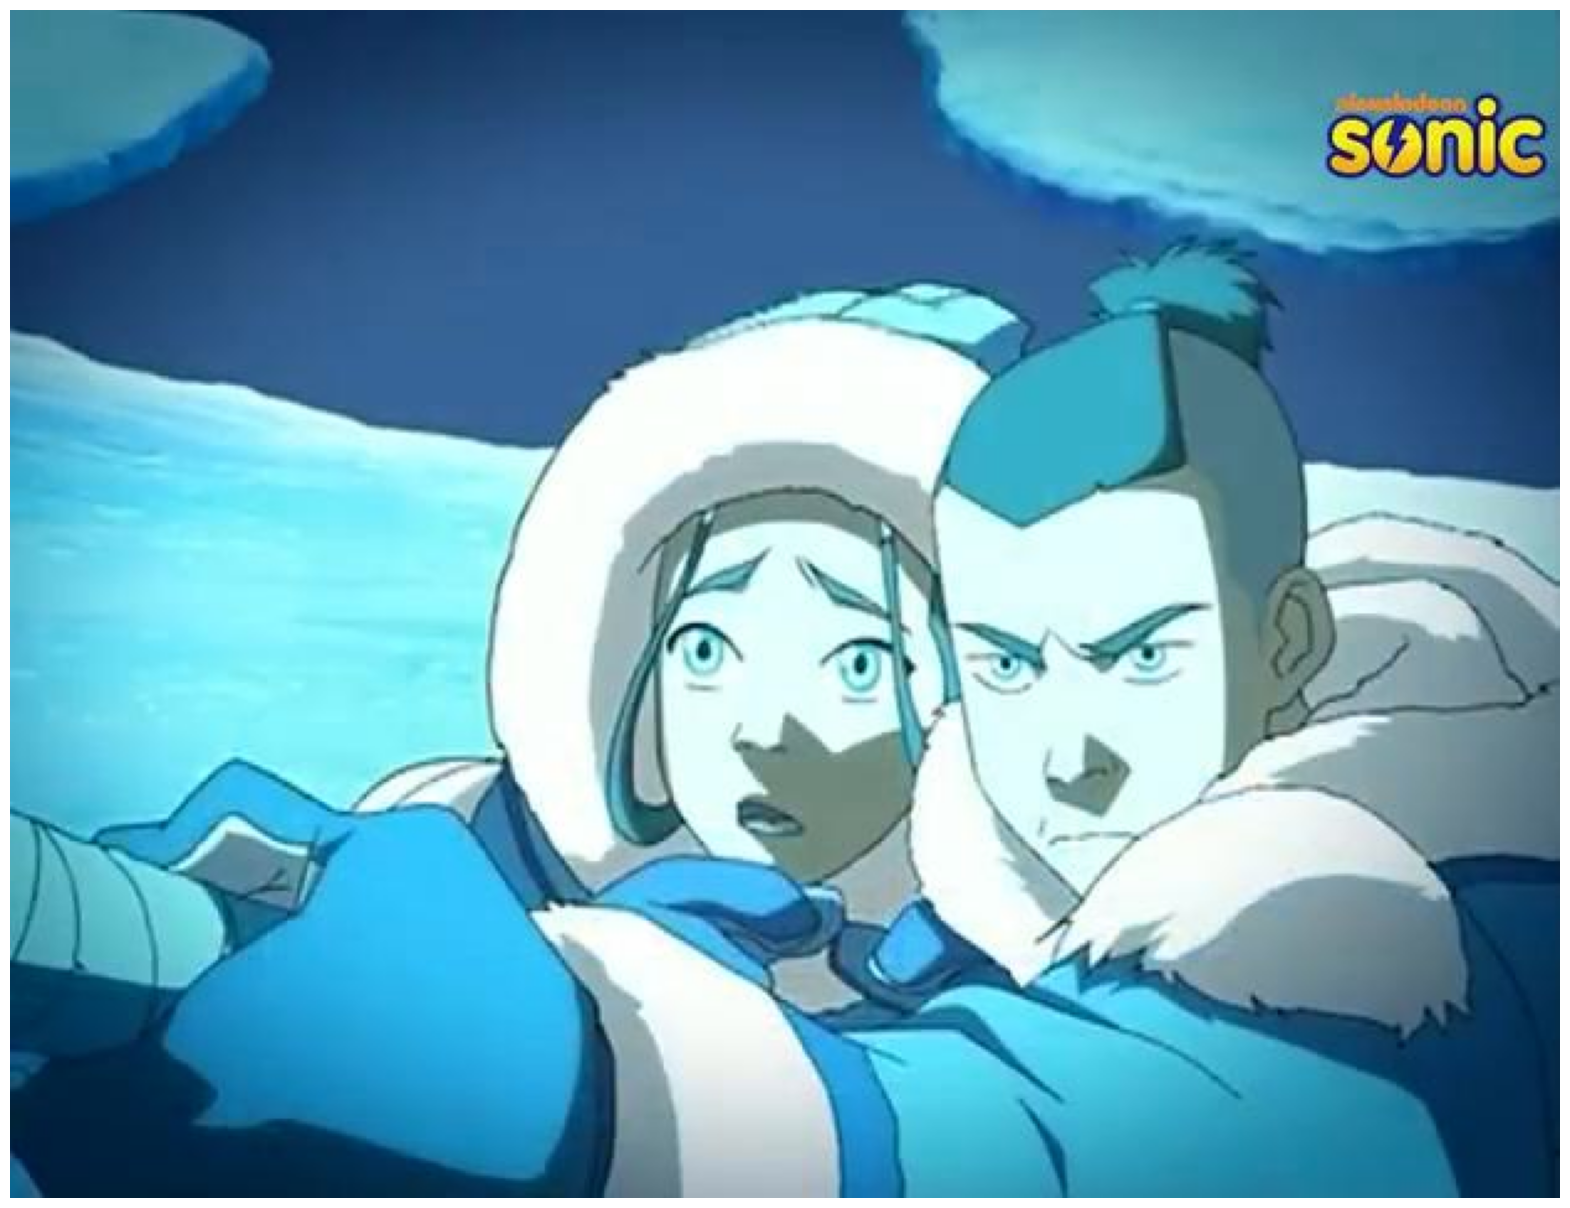

In [68]:
image = cv2.imread('/Users/santiagowon/Dropbox/Santiago/01. Maestria/Tesis/11_Project_Analysed_DB/1 summary missing/Avatar_The_Last_Airbender/scenes_output/scene_7_frame_659.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(image)
plt.axis('off')
plt.show()

In [71]:
import sys
sys.path.append("..")
from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam_checkpoint = "/Users/santiagowon/Dropbox/Santiago/01. Maestria/Tesis/10_Project/SAM Model Weights/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "cpu"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

mask_generator = SamAutomaticMaskGenerator(sam)

Mask generation returns a list over masks, where each mask is a dictionary containing various data about the mask. These keys are:

segmentation : the mask
area : the area of the mask in pixels
bbox : the boundary box of the mask in XYWH format
predicted_iou : the model's own prediction for the quality of the mask
point_coords : the sampled input point that generated this mask
stability_score : an additional measure of mask quality
crop_box : the crop of the image used to generate this mask in XYWH format

In [72]:
masks = mask_generator.generate(image)

In [75]:
masks

[{'segmentation': array([[False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         [False, False, False, ...,  True,  True,  True],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 21120,
  'bbox': [362, 0, 263, 97],
  'predicted_iou': 1.0095269680023193,
  'point_coords': [[557.53125, 7.5]],
  'stability_score': 0.9848384857177734,
  'crop_box': [0, 0, 626, 480]},
 {'segmentation': array([[False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         ...,
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False],
         [False, False, False, ..., False, False, False]]),
  'area': 61390,
  'bbox': [0, 0, 625, 192]

In [73]:
print(len(masks))
print(masks[0].keys())

67
dict_keys(['segmentation', 'area', 'bbox', 'predicted_iou', 'point_coords', 'stability_score', 'crop_box'])


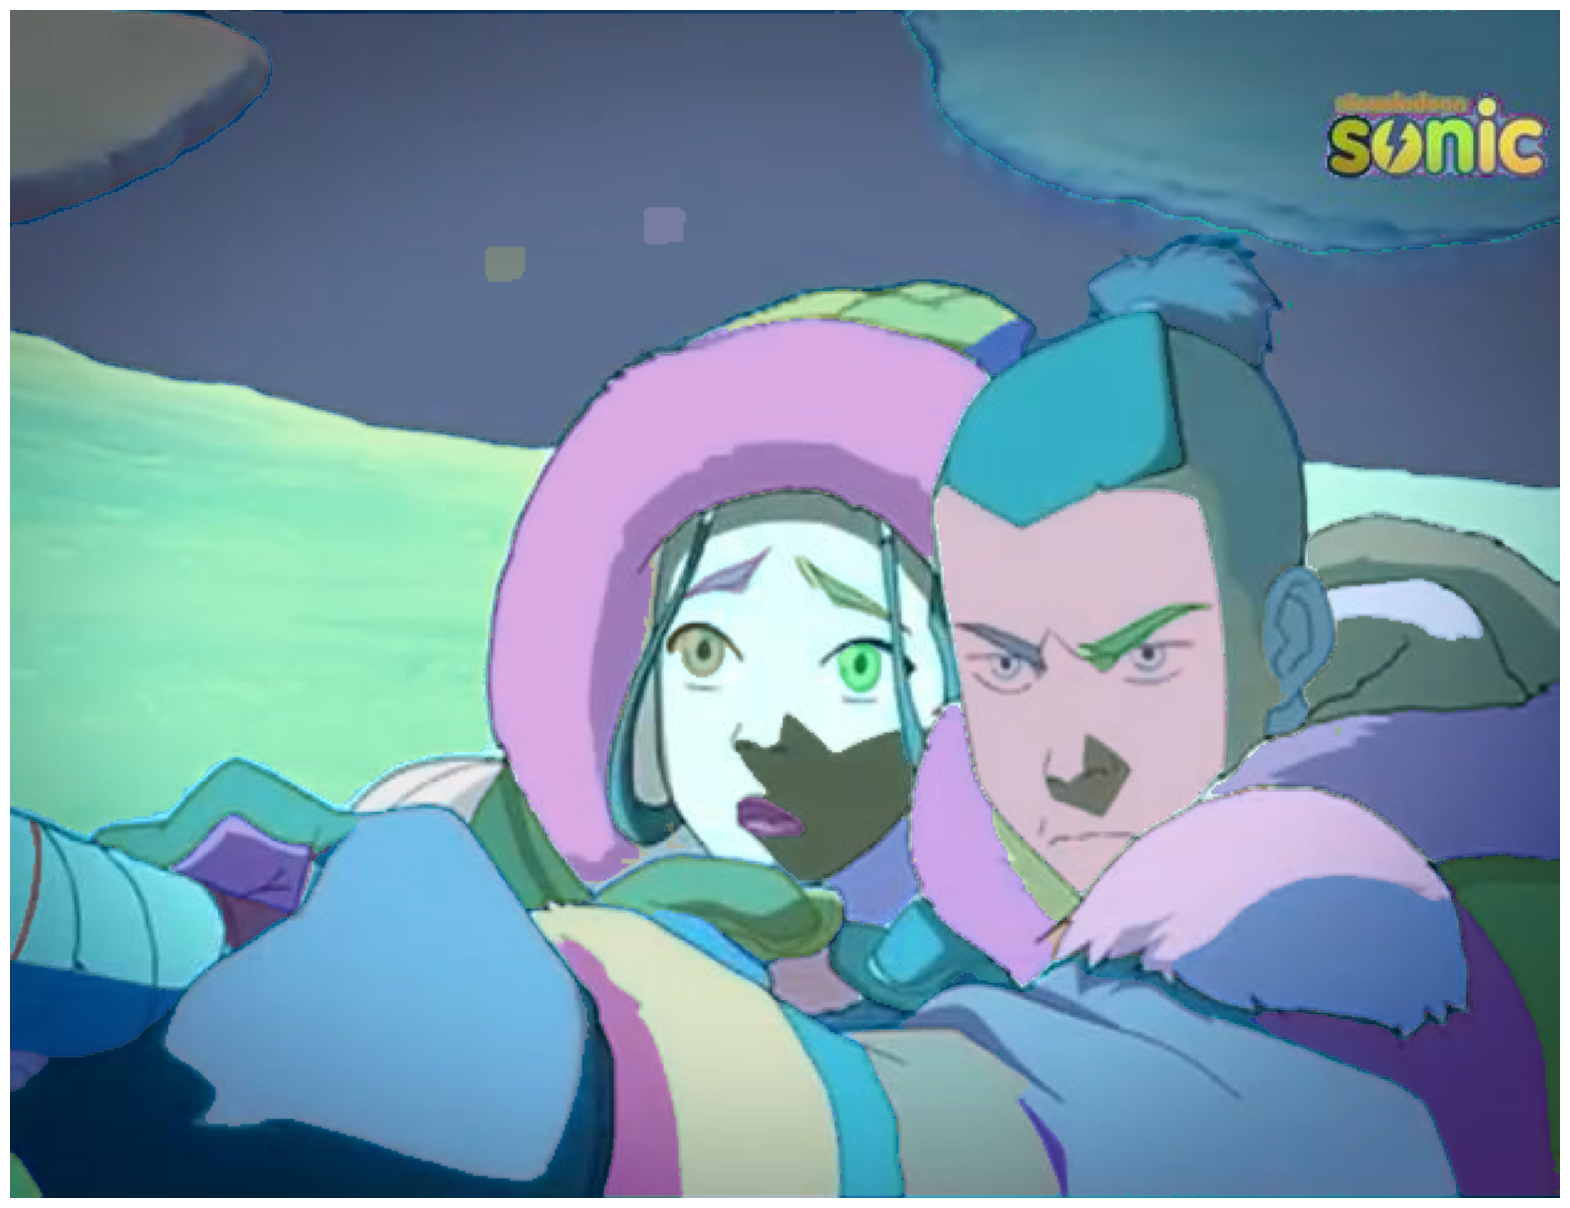

In [74]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks)
plt.axis('off')
plt.show() 

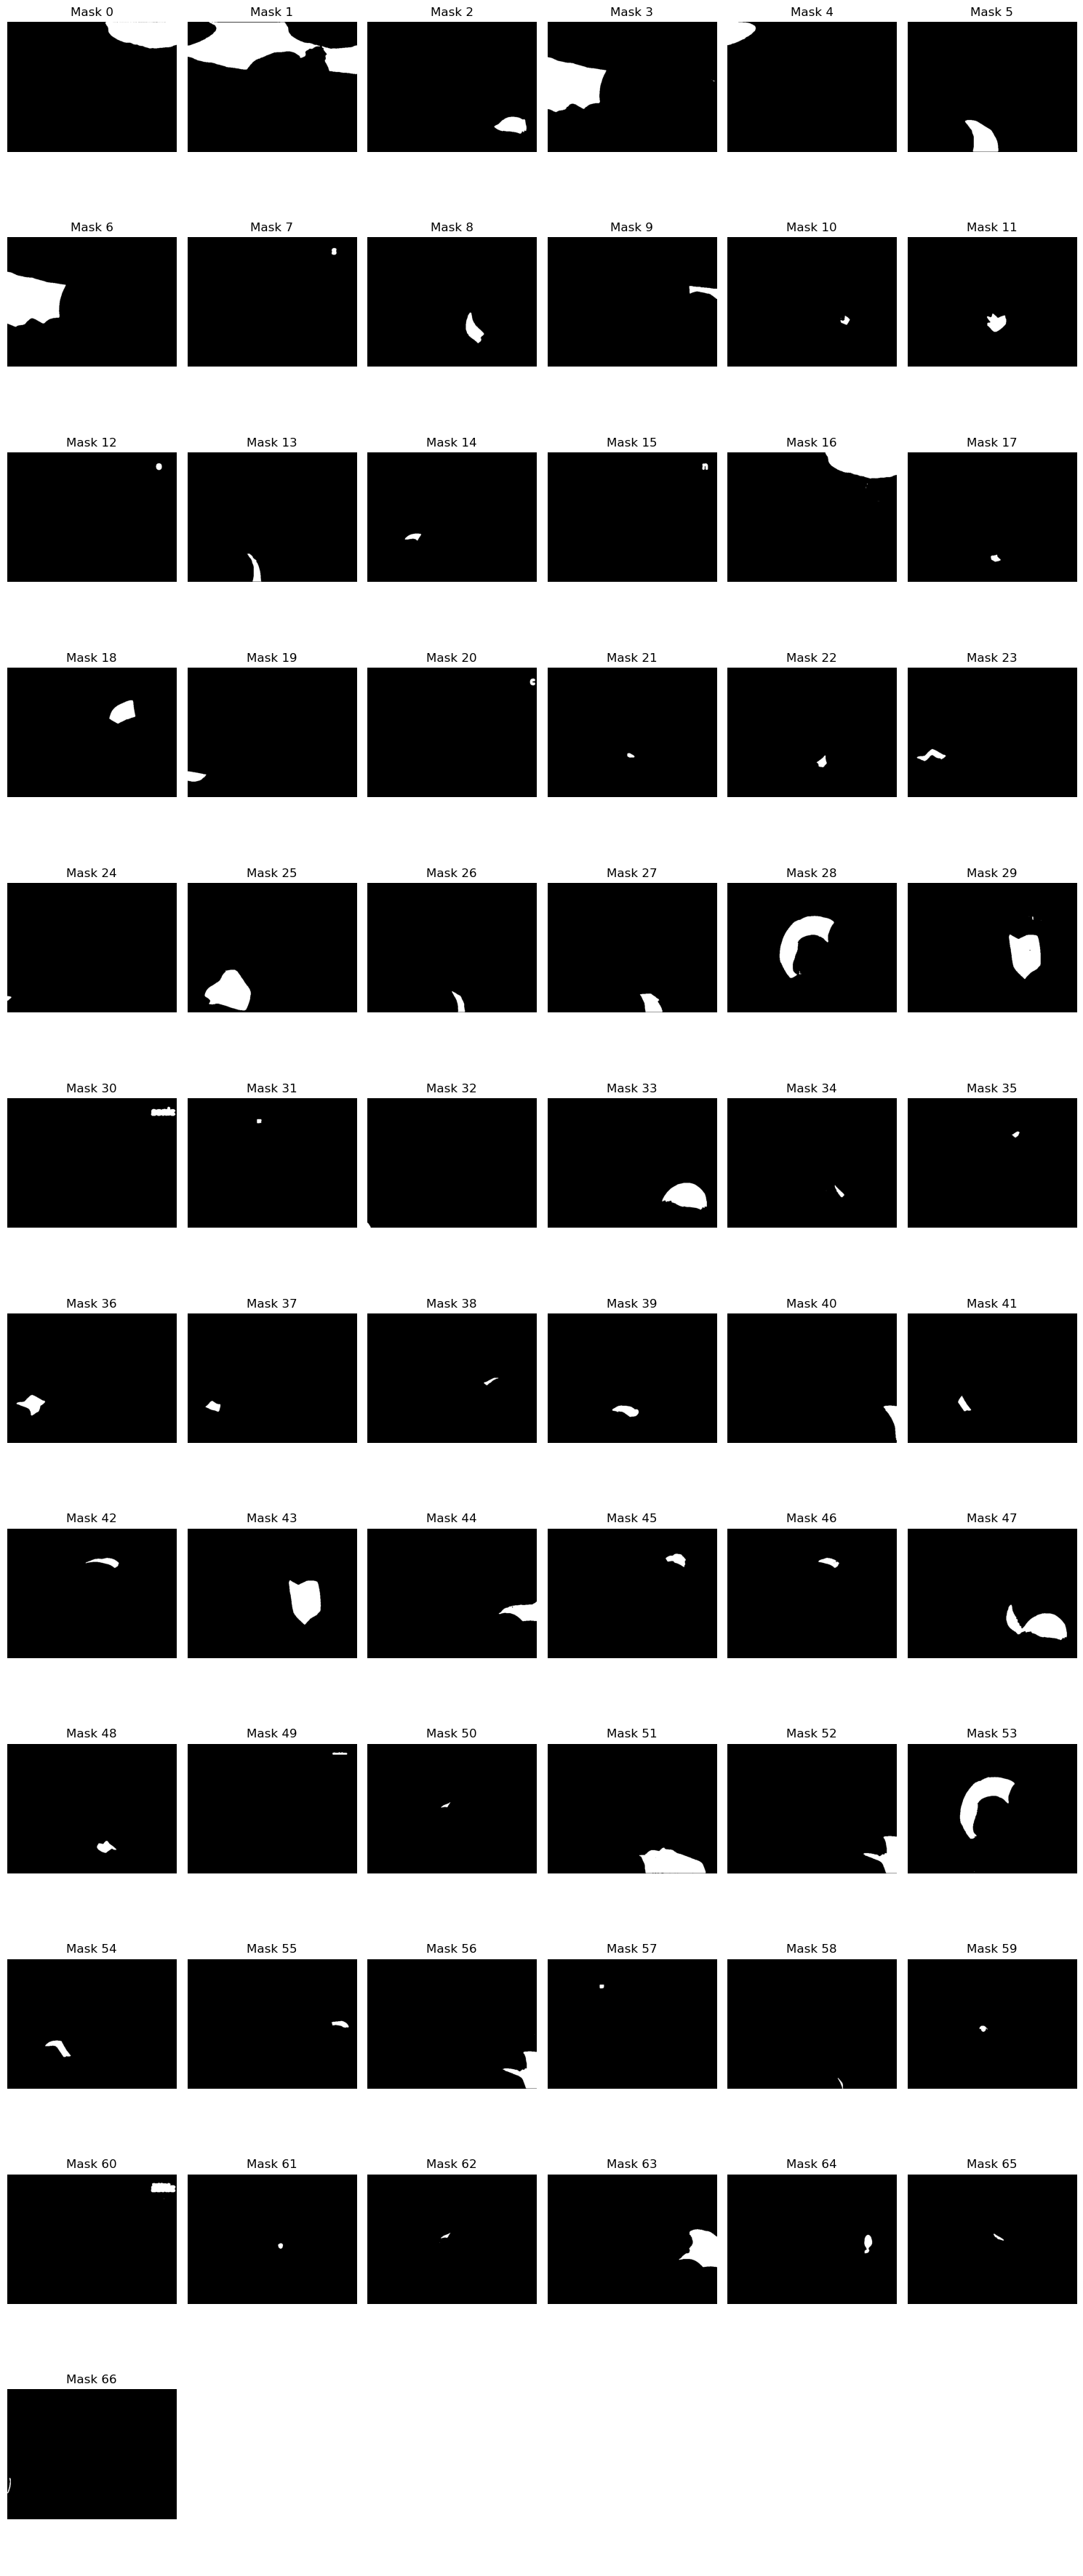

In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Example: Display the masks in rows with 6 per row
num_masks = len(masks)
cols = 6  # Number of masks per row
rows = (num_masks + cols - 1) // cols  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 3))

for idx, mask_data in enumerate(masks):
    segmentation = mask_data['segmentation']
    
    # Convert boolean mask to uint8 format for visualization
    mask_image = (segmentation.astype(np.uint8)) * 255  # 255 for white, 0 for black
    
    # Get the row and column index for this subplot
    row = idx // cols
    col = idx % cols
    
    # Display the mask in the corresponding subplot
    axes[row, col].imshow(mask_image, cmap='gray')
    axes[row, col].set_title(f"Mask {idx}")
    axes[row, col].axis('off')  # Hide axis

# Turn off any empty subplots (if there are fewer masks than grid slots)
for ax in axes.flat[num_masks:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [126]:
mask_generator_6 = SamAutomaticMaskGenerator(
    model=sam,
    points_per_side=32,  # Slightly higher point density to capture more detail
    pred_iou_thresh=0.90,  
    stability_score_thresh=0.92,  
    crop_n_layers=0,  
    crop_n_points_downscale_factor=2,  
    min_mask_region_area=100  # Allow larger regions to capture key areas
)


In [127]:
masks6 = mask_generator_6.generate(image)

In [128]:
len(masks6)

64

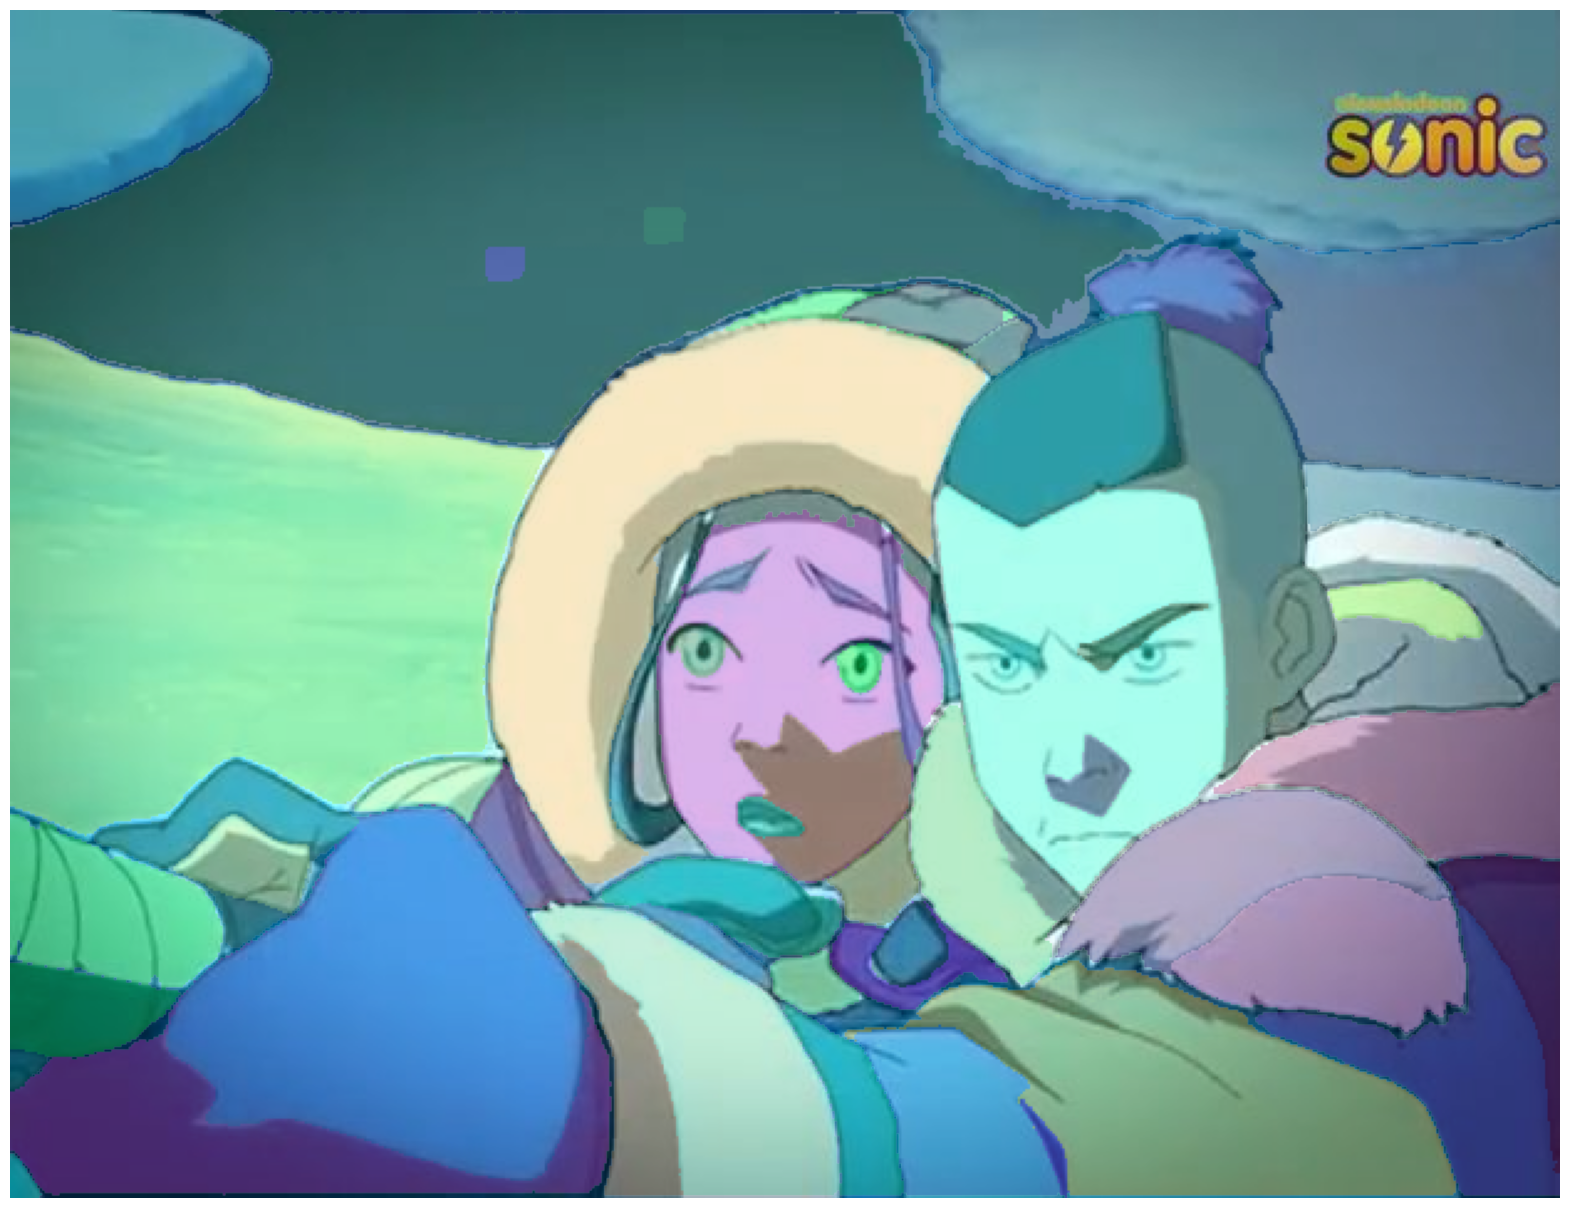

Number of masks: 64, Rows: 11, Cols: 6


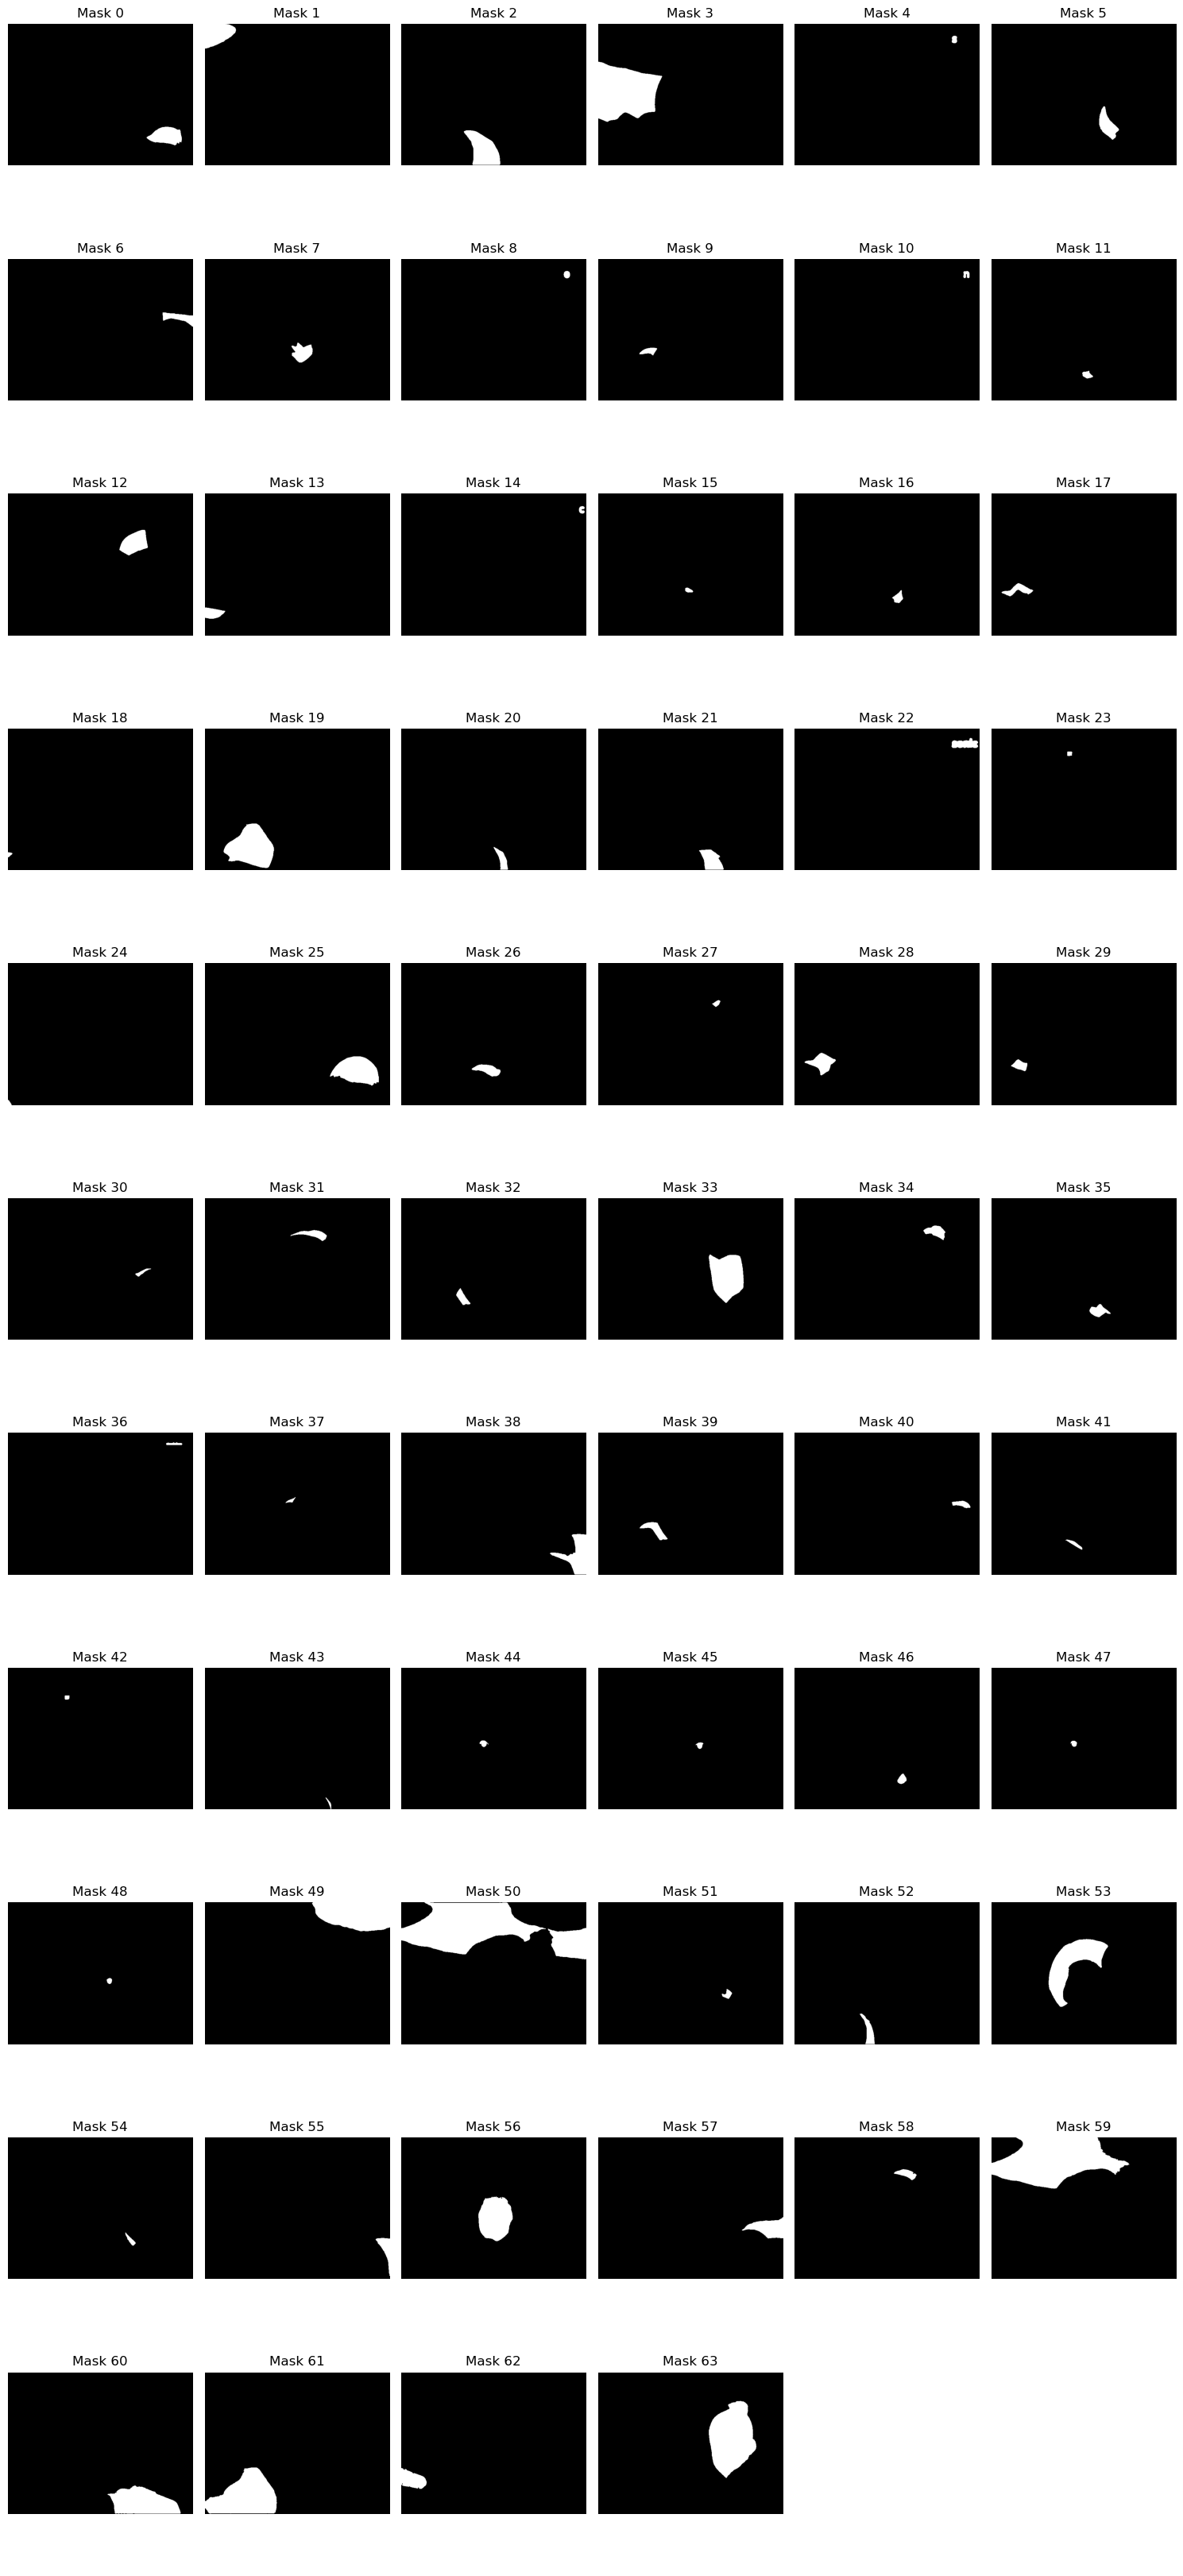

In [129]:
plt.figure(figsize=(20,20))
plt.imshow(image)
show_anns(masks6)
plt.axis('off')
plt.show() 

import numpy as np
import matplotlib.pyplot as plt

# Example: Display the masks in rows with 6 per row
num_masks = len(masks6)
cols = 6  # Number of masks per row
rows = (num_masks + cols - 1) // cols  # Calculate the number of rows needed

print(f"Number of masks: {num_masks}, Rows: {rows}, Cols: {cols}")

if num_masks == 0:
    print("Warning: No masks available to display.")

fig, axes = plt.subplots(max(1, rows), cols, figsize=(15, max(1, rows) * 3))

for idx, mask_data in enumerate(masks6):
    segmentation = mask_data['segmentation']

    # Convert boolean mask to uint8 format for visualization
    mask_image = (segmentation.astype(np.uint8)) * 255  # 255 for white, 0 for black

    # Get the row and column index for this subplot
    row = idx // cols
    col = idx % cols

    # Display the mask in the corresponding subplot
    axes[row, col].imshow(mask_image, cmap='gray')
    axes[row, col].set_title(f"Mask {idx}")
    axes[row, col].axis('off')  # Hide axis

# Turn off any empty subplots (if there are fewer masks than grid slots)
for ax in axes.flat[num_masks:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


# Selecting the Right Masks to Re-Do through OpenAI prompt Engineering for interpretation

Send the mask coordinates (bounding box, points, or segmentation coordinates) and let the OpenAI API cross-check the coordinates with the full-color image. You can use the coordinates in a prompt and ask OpenAI to determine whether the masked region belongs to the object of interest (e.g., "the girl").



Processing Mask 1/64


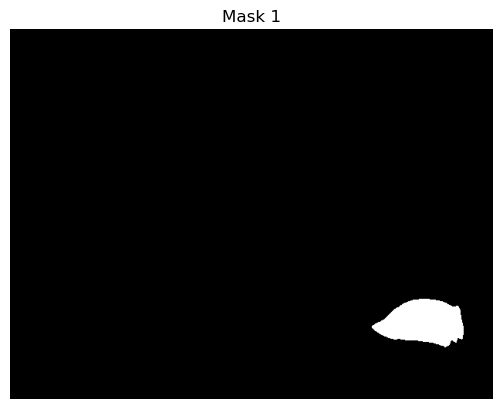

BadRequestError: Error code: 400 - {'error': {'message': "This model's maximum context length is 128000 tokens. However, your messages resulted in 266359 tokens. Please reduce the length of the messages.", 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
import base64
import openai

# This function sends the image and mask to the OpenAI API and waits for a response.
def encode_image(image_array, mask_data, max_tokens=8192, model="gpt-4o"):
    current_size = image_array.shape[1], image_array.shape[0]  # Get original size
    resized_image = Image.fromarray(image_array)

    # Keep the original mask without resizing
    original_bbox = mask_data['bbox']
    
    # Encode the image
    buffer = io.BytesIO()
    resized_image.save(buffer, format="PNG")
    encoded_image = base64.b64encode(buffer.getvalue()).decode("utf-8")

    # Create the prompt for the GPT-4 API
    prompt = f"Locate the mask's coordinates: {original_bbox}. Look at the bigger picture of the overall image. Describe what the region represented by this mask shows within the context of the entire image, and classify if this region is part of the girl or not."

    # Send the image and prompt to GPT-4 API and wait for the response
    return send_to_openai_api(encoded_image, prompt, model)

# Estimate the token count for the OpenAI API
def estimate_token_count(image_data, prompt):
    return len(image_data) // 4 + len(prompt) // 4  # Rough estimate for base64 and string tokens

# Function to send the data to the OpenAI API
def send_to_openai_api(encoded_image, prompt, model="gpt-4o"):
    response = openai.chat.completions.create(
        model=model,
        messages=[
            {"role": "system", "content": "You are a visual classifier that works on image descriptions."},
            {"role": "user", "content": f"Here is the color image: {encoded_image}. {prompt}"}
        ]
    )
    
    # Return the response
    return response.choices[0].message.content.strip()

# This function visualizes the masks and prints the OpenAI response for each mask one by one.
def visualize_masks_with_responses(image, masks6):
    num_masks = len(masks6)
    
    # If there are no masks, show a warning
    if num_masks == 0:
        print("Warning: No masks available to display.")
        return
    
    # Process each mask one by one
    for idx, mask_data in enumerate(masks6):
        print(f"Processing Mask {idx + 1}/{num_masks}")
        
        # Extract segmentation mask
        segmentation = mask_data['segmentation']
        
        # Convert boolean mask to uint8 format for visualization
        mask_image = (segmentation.astype(np.uint8)) * 255
        
        # Plot the mask
        plt.imshow(mask_image, cmap='gray')
        plt.title(f"Mask {idx + 1}")
        plt.axis('off')
        plt.show()  # Show the mask
        
        # Send to OpenAI GPT-4 API and wait for the response
        classification = encode_image(image, mask_data)
        
        # Print the GPT-4 response for the mask
        print(f"Classification for Mask {idx + 1}: {classification}")
        print("=" * 50)

# Example usage (assuming 'image' is your input image and 'masks6' is your list of masks):
# Call this function to process and display each mask and its response one by one.
visualize_masks_with_responses(image, masks6)


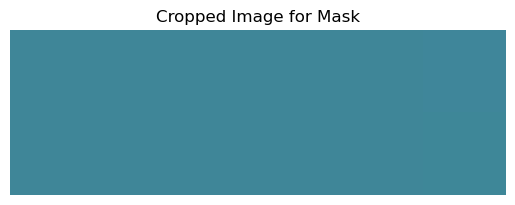

In [175]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Sample mask data and image array are assumed to be provided
# Let's assume masks6 is a list of dictionaries and image is the loaded image as a numpy array

def crop_and_display_mask(image_array, mask_data):
    # Extract the bounding box coordinates from the mask
    bbox = mask_data['bbox']
    
    # Convert normalized bbox to actual pixel values based on image size
    img_height, img_width = image_array.shape[:2]
    x = int(bbox[0] * img_width)
    y = int(bbox[1] * img_height)
    width = int(bbox[2] * img_width)
    height = int(bbox[3] * img_height)
    
    # Crop the image using the bbox values
    cropped_image = image_array[y:y + height, x:x + width]
    
    # Display the cropped mask area
    plt.imshow(cropped_image)
    plt.title(f"Cropped Image for Mask")
    plt.axis('off')
    plt.show()

# Example usage assuming 'masks6' is available and contains mask data
# Assuming image is already loaded as numpy array
crop_and_display_mask(image, masks6[0])


# In Painting with Stability AI based on the Masks from SAM